In [1]:
print("Hello Women in Python community")

Hello Women in Python community


### Women in Python assignment - May 1st
#### DEADLINE: May 5th
#### Feel free to ask questions in group or search for answers on the Internet.
#### We look forward to seeing you next week.
#### Aki and Saulo 

# PART 01

**Assignment 01**
Create a translator with Python.

The idea is to create a function which can translate a word in english to Chinese , just limited words for now .

1.   Create a list to display the words which you can translate .
2.   Create a dictonary which has a definition for the words in the list . Example : {"water":"shui","air":"kōngqì"} etc

1.  Create a function called "translate(word)" which can return the chinese translation of the word.
2.  Finally ask user to enter the word , once user enters the word pass the word to the function and display the translation.







Your program should finally show something like this, below example has only 3 words you can have more:


> *Choose one of the words below and I will translate*


>  ['water', 'air', 'sun']


>*Enter the word:* **sun**


> **sun** * in chinese is*  **日rì**



# PART 02

**Let's review the Weather app class and put the weather data into a Pandas data frame.**

In [2]:
'''
Weather app - bonus
'''



# From the Weather app class we learned:
import requests
import json

class weather(object):
    def __init__(self,mycity):
        self.city = mycity
        url = 'https://api.openweathermap.org/data/2.5/weather?q='+ mycity +'&units=metric&appid=bc4177261288e5a33a1011e923aeee10'
        response = requests.get(url)
        jsonobj = json.loads(response.content)
        print(jsonobj)
        temperature_list = jsonobj['weather']
        print(temperature_list)
        print(jsonobj['main']['humidity'])
        desc = temperature_list[0]['description']
        print(desc)
        
# From this class we can get weather information from any city, for example:
weather('Rio de Janeiro') # the best city in the world!

{'coord': {'lon': -43.21, 'lat': -22.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.97, 'pressure': 1016, 'humidity': 88, 'temp_min': 24, 'temp_max': 29}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1556323200, 'sys': {'type': 1, 'id': 8429, 'message': 0.0059, 'country': 'BR', 'sunrise': 1556269802, 'sunset': 1556310661}, 'id': 3451190, 'name': 'Rio de Janeiro', 'cod': 200}
[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}]
88
clear sky


In [3]:

# We have the data, but the format is not really friendly. Let's improve this?

# First let's import Pandas
import pandas as pd

# We only need the variable jsonobj from our Class. So, let's clean it up a bit:

class weather_vr02(object):
    def __init__(self,mycity):
        self.city  = mycity
        url        = 'https://api.openweathermap.org/data/2.5/weather?q='+ mycity +'&units=metric&appid=bc4177261288e5a33a1011e923aeee10'
        response   = requests.get(url)
        self.data  = json.loads(response.content)
      
      
# Let's check if it is working

my_city = weather_vr02('Rio de Janeiro')

In [4]:
my_city.data # That's the weather data from Rio de Janeiro

{'coord': {'lon': -43.21, 'lat': -22.91},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 25.97,
  'pressure': 1016,
  'humidity': 88,
  'temp_min': 24,
  'temp_max': 29},
 'visibility': 10000,
 'wind': {'speed': 1.5, 'deg': 90},
 'clouds': {'all': 0},
 'dt': 1556323200,
 'sys': {'type': 1,
  'id': 8429,
  'message': 0.0059,
  'country': 'BR',
  'sunrise': 1556269802,
  'sunset': 1556310661},
 'id': 3451190,
 'name': 'Rio de Janeiro',
 'cod': 200}

In [5]:
'''
Did you know that Pandas deal with Json?
'''

df_data = pd.io.json.json_normalize(my_city.data)

In [6]:
df_data.head(5) # The problem here is that the variable "Weather" is still in a strange format: It is a list of dictionary. Check it out.

,base,clouds.all,cod,coord.lat,coord.lon,dt,id,main.humidity,main.pressure,main.temp,...,sys.country,sys.id,sys.message,sys.sunrise,sys.sunset,sys.type,visibility,weather,wind.deg,wind.speed
0,stations,0,200,-22.91,-43.21,1556323200,3451190,88,1016,25.97,...,BR,8429,0.0059,1556269802,1556310661,1,10000,"[{'id': 800, 'main': 'Clear', 'description': '...",90,1.5


In [7]:
# If we are acquainted with our data, we can tell Pandas what the variable "Weather" looks like:
df_weather = pd.io.json.json_normalize(my_city.data, 'weather')
df_weather # show data frame

,description,icon,id,main
0,clear sky,01n,800,Clear


In [8]:
# Let's now merge both df_data and df_weather to have only one data frame with all data.
df_all = pd.concat([df_data,df_weather], axis=1, sort=False)

# Finally, we do not want the variable "weather" anymore, so let's remove them.
df_all.drop(['weather'], axis=1, inplace=True)

# Let's improve further this data frame by turning the column into index by transposing the data frame.
df_all = df_all.set_index('name').T

df_all

name,Rio de Janeiro
base,stations
clouds.all,0
cod,200
coord.lat,-22.91
coord.lon,-43.21
dt,1556323200
id,3451190
main.humidity,88
main.pressure,1016
main.temp,25.97


In [9]:
'''
Let's get these pieces of code and throw them in a function
'''

def weather_data_to_pandas_df(weather_json_obj):
    df_data    = pd.io.json.json_normalize(weather_json_obj)
    df_weather = pd.io.json.json_normalize(weather_json_obj, 'weather')
    df_all     = pd.concat([df_data,df_weather], axis=1, sort=False)
    df_all.drop(['weather'], axis=1, inplace=True)
    df_all = df_all.set_index('name').T

    return df_all

In [10]:
# usage
weather_data_to_pandas_df(weather_vr02('Shenzhen').data)

name,Shenzhen
base,stations
clouds.all,75
cod,200
coord.lat,22.54
coord.lon,114.05
dt,1556325627
id,1795565
main.humidity,74
main.pressure,1013
main.temp,25.8


In [11]:
# We can actually get the weather information for many cities at the same time.

dfs = []
for city_name in ['Rio de Janeiro', 'Shenzhen', 'Amsterdam']:
    df = weather_data_to_pandas_df(weather_vr02(city_name).data)
    dfs.append(df)

df_cities = pd.concat(dfs, axis=1)
df_cities

name,Rio de Janeiro,Shenzhen,Amsterdam
base,stations,stations,stations
clouds.all,0,75,0
cod,200,200,200
coord.lat,-22.91,22.54,52.37
coord.lon,-43.21,114.05,4.89
dt,1556323200,1556325627,1556325505
id,3451190,1795565,2759794
main.humidity,88,74,76
main.pressure,1016,1013,1011
main.temp,25.97,25.8,10.61


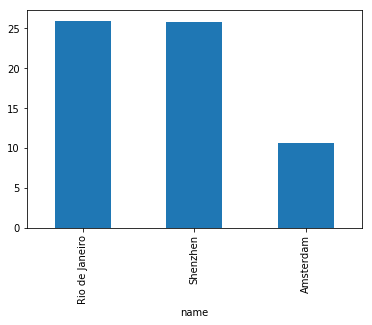

In [15]:
df_cities.loc['main.temp'].plot.bar()

**Assignment 02: Data exploration**

Using the example above, do the following:

**1.Add other 3 cities to the data frame (tip: use the 'for' loop as shown above).**

**2. Make a figure showing the humidity of all cities.**

**3. Remove one of the cities from your data frame.**

**4. Bonus task: add a new row providing information on what to dress based on the temperature.**





In [13]:
'''
Tips for task #4
'''

# 1) adding a new index row in Pandas

df = pd.DataFrame({'A':1,'B':2,'C':3}, index=['first_row']) # creating a generic data frame
df


,A,B,C
first_row,1,2,3


In [14]:
df.loc['new_row'] = [4,5,6] # I just picked three values - remember that it has to have 3 columns to match the shape of the data frame
df

,A,B,C
first_row,1,2,3
new_row_name,4,5,6
